#### Carregando os modulos

In [1]:
import pandas as pd
from pathlib import Path
import converte as cv
import matplotlib.pyplot as plt
import calendar as cd
import matplotlib as mpl
import re
import pathlib as pt 


#### Definindo estilo Matplotlib

In [2]:
mpl.style.use('ggplot')
mpl.rcParams['font.family'] = ['Family1', 'Serif', 'cursive']
mpl.rcParams['font.size'] = 23
mpl.rcParams['figure.max_open_warning'] = 50

In [7]:
caminho = pt.Path('dados')
#arquivos = [i for i in caminho.glob('**/*.txt') if str(i)[6] !='t'] #todos pastas
kp_a = [i for i in (caminho/'kp').glob('*.txt')]
dst_a = [i for i in (caminho/'dst').glob('*.txt')]
busca = re.compile('\d\d\d\d')

#### Limpando dados do kp

In [27]:
colunas = ['tempo',0, 3, 6, 9, 12, 15, 18, 21]
for arq in kp_a:
    ano = int(''.join(busca.findall(str(arq))))
    print(ano)
    caminho = arq
    df = pd.read_fwf(caminho, skiprows=0)
    mes_dia = [cd.monthrange(year=ano, month=i)[1] for i in range(1, 13)]
    q_dias_m = sum(mes_dia)
    anos = [2005, 2011, 2013, 2014, 2015, 2017]
    col2 = df.columns.values[1]

    if col2 == 'Kp[8]           Sum ap[8]':
        kp = df['Kp[8]           Sum ap[8]'].str.split('', n=0, expand=True)

    else:
        kp = df['Kp[8]           Sum'].str.split('', n=0, expand=True)
    df365 = []
    df365 = pd.DataFrame().T
    df365['tempo'] = pd.date_range(f'1/1/{ano}', periods=q_dias_m, freq='D')
    for num, simb, hora in zip(range(1, 16, 2), range(2, 17, 2), range(0, 22, 3)):
        df365[f'{hora}'] = kp[num]+kp[simb]
        

        
    df = pd.melt(df365, id_vars='tempo', var_name='hora', value_name='kp', ignore_index = True).sort_values('tempo')
    df.reset_index(inplace=True)
    df.drop(['tempo', 'index'], axis=1, inplace=True)
    df['hora'] = df.hora.astype(int)


    start1 = 0
    start2 = 8
    fim = len(df)
    while start2<=fim:
        df[start1:start2] = df[start1:start2].sort_values('hora', ascending=True)
        start1 = start2
        start2+=8
    df.set_index(pd.date_range(start=f'{ano}/1/1', periods=8*q_dias_m, freq='3h'), inplace=True)
    #df.drop('hora', axis=1, inplace=True)
    df['Kp_o'] = df['kp']
    for ki, kd in zip(cv.kp_in, cv.kp_deci):
        df['kp'].replace(ki, kd, inplace=True)
    df.kp.astype(float)
    df.to_string(f'dados/kp/{ano}_limpo.txt', index=True)
    df['kp'] = df.kp.astype(float)
    
    #df[2048:2048+72].plot(kind='bar', figsize=(19, 6), grid=True)
a = df.index.values

2016
Kp[8]           Sum
2006
Kp[8]           Sum
2010
Kp[8]           Sum
2018
Kp[8]           Sum
2005
Kp[8]           Sum ap[8]
2002
Kp[8]           Sum
2004
Kp[8]           Sum
2019
Kp[8]           Sum
2012
Kp[8]           Sum
2001
Kp[8]           Sum ap[8]
2013
Kp[8]           Sum
2008
Kp[8]           Sum
2003
Kp[8]           Sum
2015
Kp[8]           Sum
2014
Kp[8]           Sum
2017
Kp[8]           Sum
2007
Kp[8]           Sum
2009
Kp[8]           Sum
2011
Kp[8]           Sum


#### Plotando dados das 50 maiores tempestades

In [26]:

df2 = pd.read_csv('dados/tempestades/tempestades_kp_decimais.txt', delimiter='\s+')
df2.drop(['Ap', 'Kp_Max_dia'],axis=1, inplace=True)

df3 = pd.melt(df2, id_vars='data', var_name='hora', value_name='kp', ignore_index = True).sort_values('data')
start1 = 0
start2 = 8
fim = len(df2)
while start2<=fim:
    df3[start1:start2] = df3[start1:start2].sort_values('hora', ascending=True)
    start1 = start2
    start2+=8
df3.reset_index(inplace=True)
df3.drop('index', axis=1, inplace=True)


In [23]:
df3

,data,hora,kp
0,1994/02/21,kp_0h,2.33
1,1994/02/21,kp_12h,7.67
2,1994/02/21,kp_15h,7.67
3,1994/02/21,kp_18h,6.00
4,1994/02/21,kp_21h,7.00
...,...,...,...
395,2021/11/04,kp_21h,2.00
396,2021/11/04,kp_9h,7.67
397,2021/11/04,kp_0h,6.33
398,2021/11/04,kp_18h,1.67


NameError: name 'colunas' is not defined

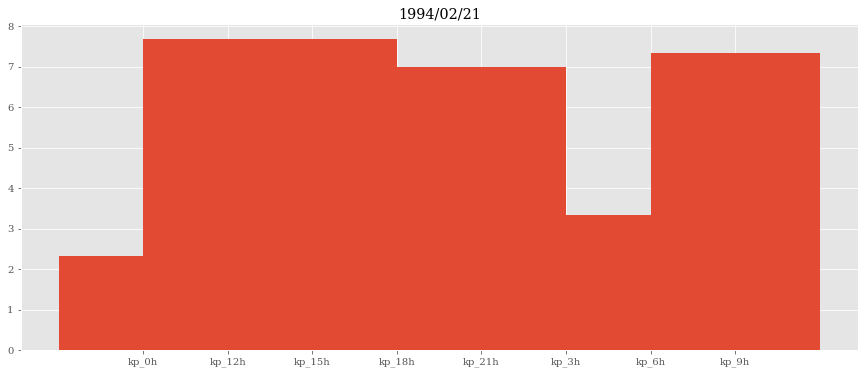

In [25]:
start1 = 0
start2 = 8
fim = len(df3)
while start2<=fim:
    fig=plt.figure(figsize=(15, 6))
    bar = df3[start1:start2]
    legenda = bar['data'][:start2][:1]
    plt.bar(x=bar['hora'], height=bar['kp'], width=2)
    plt.title(''.join(legenda.values))
    plt.xticks(colunas[1:])
    plt.xlabel('Horas')
    plt.ylabel('Kp')
    plt.yticks(range(0, 10))
    start1 = start2
    start2+=8
    fig.savefig(f'imegens/50_tempestades/{"".join(legenda.values).replace("/", "-")}')